#Author: Riadul Islam Rabbi

#Organization: The Sparks foundation(TSF)

<h2><center>Prediction using Decision Tree 
Algorithm</center></h2>

<h3>***Decision Tree Algorithm Intuition***</h3>

A Decision Tree is a supervised algorithm used in machine learning. It is using a binary tree graph (each node has two children) to assign for each data sample a target value. The target values are presented in the tree leaves. 

###Create the Decision Tree classifier and visualize it graphically. 

####Objective: The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 


##Importing Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler



##Loading Dataset

In [ ]:
iris_data = pd.read_csv('/content/Iris.csv')
iris_data.head() # Showing first five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##EDA and Visualization

In the `Iris.csv dataset` , column names have "Id", "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm".

In [ ]:
iris_data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

There are 150 rows and six columns.

In [ ]:
iris_data.shape

(150, 6)

When I have used isnull() method in the iris dataset with using sum(), I got find there are no missing values.

In [ ]:
iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

By info() method we know about dataset. It is helpful method for the data science field. Here , 4 columns are float64, one column int64 and  one column object.

In [ ]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In the `Species` column has equlal types of virginica, setosa, versicolor.

In [ ]:
iris_data['Species'].value_counts().to_frame()

,Species
Iris-virginica,50
Iris-setosa,50
Iris-versicolor,50


In [ ]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


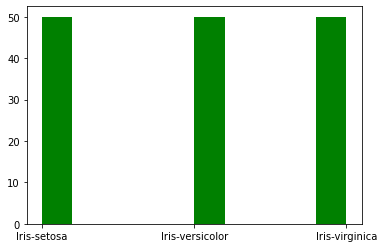

In [ ]:
plt.hist(iris_data.Species, color='g')
plt.show()

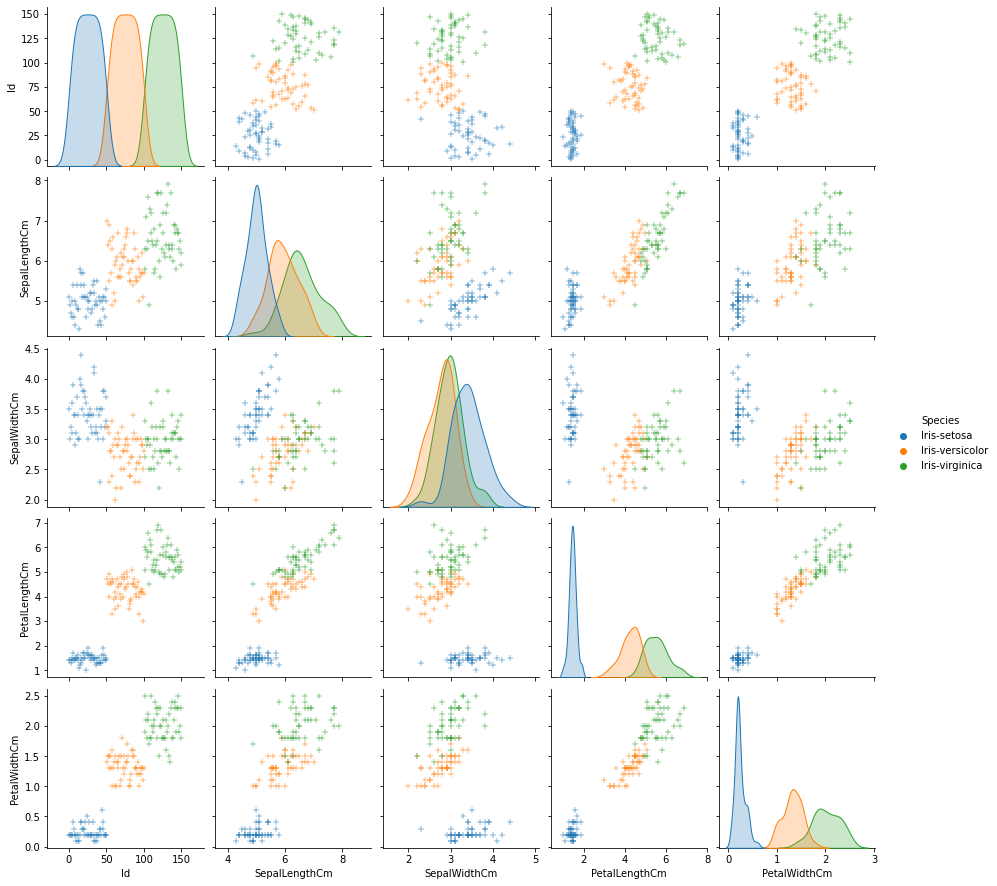

In [ ]:
g  = sns.pairplot(data= iris_data,hue='Species', markers='+',)

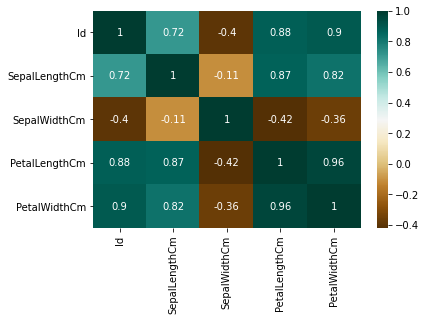

In [ ]:
sns.heatmap(iris_data.corr(),  cmap='BrBG', annot=True)

## Separated by features(input) and target(output) variables

In [ ]:
X = iris_data.drop('Species' , axis = 1)
y = iris_data.Species

##Trian Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.30, random_state = 42, stratify = y)
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (105, 5)
X_test:  (45, 5)
y_train:  (105,)
y_test:  (45,)


##Baseline Model

In [ ]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_predict =  dtc.predict(X_test)

In [ ]:
prediction_value = pd.DataFrame({'Actual value': y_test, 'Predicted Value': y_predict})
prediction_value.head(10)

,Actual value,Predicted Value
107,Iris-virginica,Iris-virginica
63,Iris-versicolor,Iris-versicolor
133,Iris-virginica,Iris-virginica
56,Iris-versicolor,Iris-versicolor
127,Iris-virginica,Iris-virginica
140,Iris-virginica,Iris-virginica
53,Iris-versicolor,Iris-versicolor
69,Iris-versicolor,Iris-versicolor
20,Iris-setosa,Iris-setosa
141,Iris-virginica,Iris-virginica


##Model Performance Evaluation

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix
print(classification_report(y_predict, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        15
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



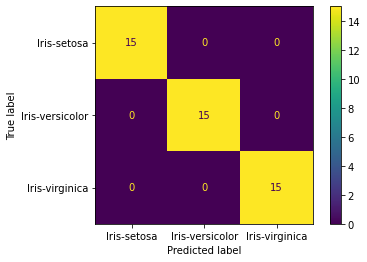

In [ ]:
plot_confusion_matrix(dtc, X_test, y_test )

##Visualize Graphically with using Graphviz

In [ ]:
fn=['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

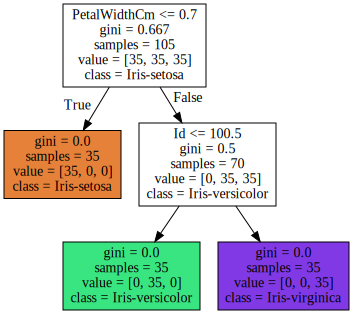

In [ ]:
from sklearn import tree
import graphviz

dot_iris = tree.export_graphviz(dtc,max_depth=5, out_file= None, feature_names=fn, class_names= cn, filled=True)

#Draw graph
graph = graphviz.Source(dot_iris, format = 'png' )
graph

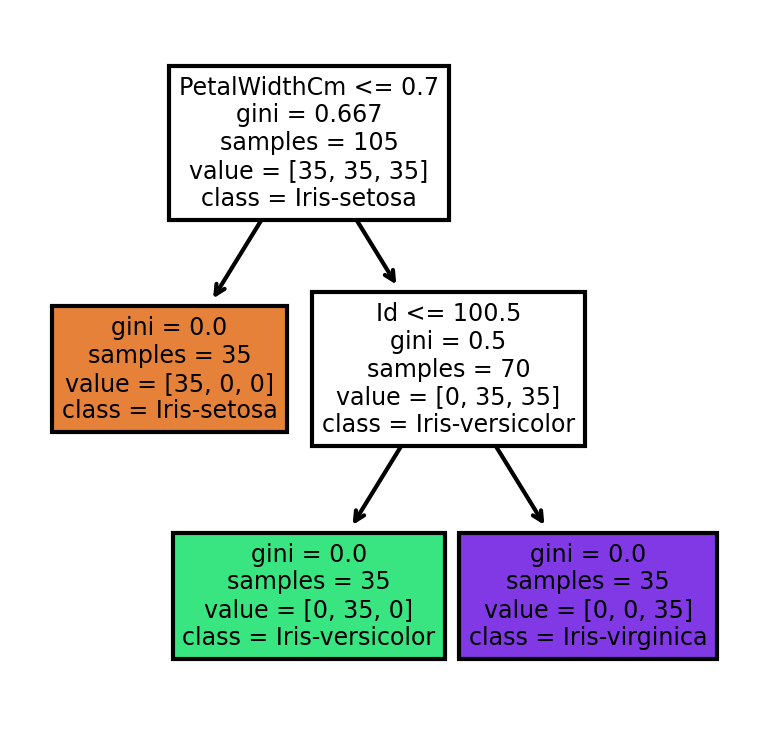

In [ ]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(dtc,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('imagename.png')